# Модуль А. Анализ и предобработка данных

## Импортирование библиотек

In [32]:
# библиотека для разархивации данных
import zipfile

# библиотека для работы с данными
import pandas as pd

# библиотека для визуализации данных
import matplotlib.pyplot as plt

# библиотека для работы с файлами
import os

# библиотека для работы со словарями
from collections import defaultdict

## Загрузка данных

Для того чтобы начать работать с данными, надо разархивировать их из архива `archive.zip`

In [4]:
path1_to_zip = r'D:\Helper\MLBazyak\homework\face_recognition\data\face_det\archive.zip'  # путь к архиву для детектирования лиц
path1_to_unzip = r'D:\Helper\MLBazyak\homework\face_recognition\data\face_det' # путь, куда будут разархивированы данные

path2_to_zip = r'D:\Helper\MLBazyak\homework\face_recognition\data\face_ind\archive.zip'  # путь к архиву для распознавания лиц
path2_to_unzip = r'D:\Helper\MLBazyak\homework\face_recognition\data\face_ind' # путь, куда будут разархивированы данные

with zipfile.ZipFile(path1_to_zip, 'r') as zip:   # открываем архив для детектирования лиц для чтения как zip
    zip.extractall(path1_to_unzip)            # загружаем все данные 

with zipfile.ZipFile(path2_to_zip, 'r') as zip:   # открываем архив для распознавания лиц для чтения как zip
    zip.extractall(path2_to_unzip)            # загружаем все данные 

После того, как все данные выгружены, можно начинать с ними работать

## Датасет для детекции лиц

**Структура данных в наборе:**


└── face_ind/    

        └── images/       # папка с фотографиями
            └── train/           # тренировочный набор
                └── 04013.png         # экземпляр фото
                └── 04111.png
                └── 04420.png
                └── 04837.png
                └── etc ...
            
        └── labels/       # папка с разметкой 
            └── train/           # тренировочный набор
                └── 04013.txt         # экземляр разметки в формате YOLO (txt файл)
                └── 04111.txt
                └── 04420.txt
                └── 04837.txt
                └── etc ...
        



для просмотра разметки я буду использовать `YOLO Annotation Tool` 

чтобы приступить к работе с ним, надо перейти на [репозиторий с YAT](https://github.com/Rainfue/YAT), загрузить его как архив, и разахрхивировать его себе на компьютер

*пример кода*
```py
with zipfile.ZipFile(r'C:\Users\user1\Project\face_recognition\Module1\YAT\YAT-main.zip', 'r') as zip:
    zip.extractall(r'C:\Users\user1\Project\face_recognition\Module1\YAT')
```

далее, надо запустить файл `Annotate.html` и приступить к работе

для того чтобы просматривать разметку, надо создать  `.txt` файл с классами (у нас 1 класс, лицо)

*вот так выглядит `classes.txt`:*

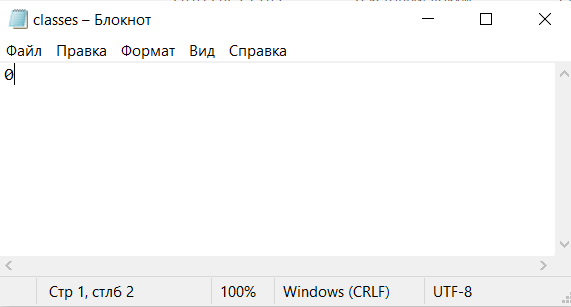

после этого, можно загрузить `txt` файл с классами, `фотографии` и `разметку` к ним, для того чтобы начать просматривать датасет

проверяем, есть ли файлы без разметки:

In [29]:
labels_dir = r'D:\Helper\MLBazyak\homework\face_recognition\data\face_det\labels\train'
images_dir = r'D:\Helper\MLBazyak\homework\some _data\face_det\Custom_Data\images\train'

Всего фотографий: 1154
Всего .txt файлов: 1154
Всего файлов с разметкой: 1154
Варианты кол-ва людей: [1, 2, 3, 4, 5, 6, 7, 9, 11]
---------------------------------------------
Кол-во людей 1: 959 фотографий
Кол-во людей 2: 157 фотографий
Кол-во людей 4: 9 фотографий
Кол-во людей 3: 22 фотографий
Кол-во людей 6: 2 фотографий
Кол-во людей 9: 1 фотографий
Кол-во людей 5: 2 фотографий
Кол-во людей 7: 1 фотографий
Кол-во людей 11: 1 фотографий


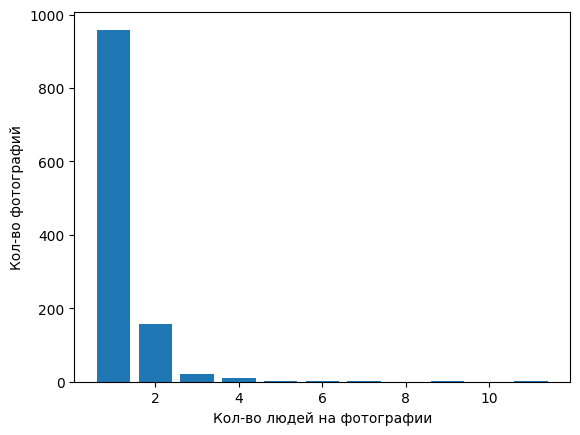

In [41]:
images_counter = 0
label_counter = 0
true_label = 0
num_people = []
num_stats = defaultdict(int)

for image in os.listdir(images_dir):
    images_counter+=1

for label in os.listdir(labels_dir):
    label_counter+=1
    with open(os.path.join(labels_dir,label), 'r') as f:
        lines = f.readlines()
        if len(lines) > 0:
            true_label+=1
            num = 0
            for line in lines:
                num+=1
            num_people.append(num)
            num_stats[num] += 1

print(f'Всего фотографий: {images_counter}')
print(f'Всего .txt файлов: {label_counter}')
print(f'Всего файлов с разметкой: {true_label}')
print(f'Варианты кол-ва людей: {list(set(num_people))}')
print('---------------------------------------------')

for num, count in num_stats.items():
    print(f'Кол-во людей {num}: {count} фотографий')

plt.bar(num_stats.keys(), num_stats.values())
plt.xlabel('Кол-во людей на фотографии')
plt.ylabel('Кол-во фотографий')
plt.show()


**можно заметить, что всего у нас 1154 фотографии, к каждой фотографии есть разметка *(не пустая)*, а также кол-во людей довольно вариативное**

## Датасет для распознавания лиц

**Структура данных в наборе:**

└── face_ind/    

    ├── lfw-deepfunneled/
        └── lfw-deepfunneled/
            └── Aaron_Eckhart/                           # имя человека
                └── Aaron_Eckhart_0001.jpg               # экземпляр фото человека
            └── Aaron_Guiel/  
                └── Aaron_Guiel_0001.jpg                
            └── Aaron_Patterson/
                └── Aaron_Patterson_0001.jpg
            └── etc ...
            
    ├── lfw_allnames.csv                                 # csv файл с подсчетом колва фотографий на имя
    ├── lfw_readme.csv      
    ├── matchpairsDevTest.csv      
    ├── matchpairsDevTrain.csv      
    ├── mismatchpairsDevTest.csv      
    ├── mismatchpairsDevTrain.csv      
    ├── pairs.csv      
    ├── people.csv                                       # csv файл с подсчетом колва фотографий на имя   
    ├── peopleDevTest.csv      
    ├── peopleDevTrain.csv      
    ├── archive.zip                                      # изначальный архив с данными


загружаем `people.csv` как `DataFrame` используя библиотеку `pandas`, и вывожу первые 5 строчек

In [ ]:
df1 = pd.read_csv(r'C:\Users\user1\Project\face_recognition\Module1\data\people.csv', low_memory=False)
df1['images'] = df1['images'].fillna(0)  # заменяю все отсутствующие данные на 0
df1['images'] = df1['images'].astype(int)  # меняю тип данных на int
df1.head()

собрал все уникальные значения, удалил все повторения

In [ ]:
plt.plot(list(set(df1['images'].values)))
plt.show()